# Uebungsblatt 3 - Aufgabe 2

In [43]:
%reset -fs
import numpy as np
import numpy.linalg as la
import scipy.sparse as sp
import matplotlib.pyplot as plt

# for import of MAT files
import scipy.io
import os

### Load sparse matrix from file into scipy csc_matrix data type

In [44]:
path_to_file = os.path.join('Vorlagen','sparse_matrix.dat')
file_contents = scipy.io.loadmat(path_to_file)
matrix = file_contents['west0479']

In [45]:
B = matrix.dot(matrix.T)

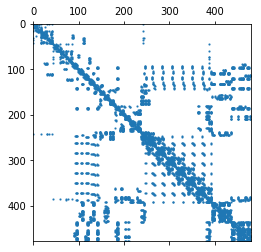

In [46]:
plt.spy(B,precision=0.01,markersize=1)
plt.show()

In [47]:
A = np.array([[4,2,3],[3,8,1],[1,2,2]])
y = [1,2,1]
x = la.inv(A).dot(y)
print("x=",x)

x= [-0.1   0.25  0.3 ]


### Test: sum over list vs. dot produkt

In [48]:
i = 500
A = np.random.rand(25000,25000)
x = np.random.rand(25000)
#%timeit sum([A[i,j]*x[j] for j in range(0,i)])

In [49]:
i = 500
#%timeit A[i,0:i].dot(x[0:i])

###### --> Use dot product

### Gauss-Seidel Algorithmus

In [67]:
def Gauss_Seidel(A,y):
    
    MAX_ITER = 100
    EPSILON = 10e-8
    
    N = A.shape[0]
    x = np.zeros(N)
    n = 1
    e = 0
      
    while (n < MAX_ITER):
        x_neu = np.zeros(N)
        #print("x=",x)
        for i in range(0,N):
            x_neu[i] = y[i] - A[i,0:i].dot(x_neu[0:i]) - A[i,i+1:N].dot(x[i+1:N])
            x_neu[i] = x_neu[i]/A[i,i]
           
        e = la.norm(A.dot(x_neu) - y,2)/la.norm(y,2)
              
        if (e < EPSILON):
            return x_neu, e, n
        
        x, x_neu = x_neu, x
        n = n + 1
        #print('---')
        #print("x = ",x)
        #print("x_neu = ", x_neu)
        #print("Ax = ",A.dot(x))
    
    print("Error, too many iterations.")
    return x,e,n

### Test on small Matrix A

In [68]:
A = np.array([[2.,2.,3.],[3.,4.,1.],[1.,2.,1.]])
#A = 5*np.random.rand(3,3)
y = np.array([1.,2.,3.])
print(A)
print(y)
print("Soll: x = ",la.inv(A).dot(y))
a,b,c = Gauss_Seidel(A,y)
print("Ist:  x = ",a)
print("      e = ",b)
print("      n = ",c)

[[ 2.  2.  3.]
 [ 3.  4.  1.]
 [ 1.  2.  1.]]
[ 1.  2.  3.]
Soll: x =  [-3.33333333  2.83333333  0.66666667]
Ist:  x =  [-3.33333331  2.83333329  0.66666672]
      e =  3.71996464842e-08
      n =  26


###  Test on large (sparse) Matrix B

In [75]:
N = B.shape[0]
Bmult = 1000*np.eye(N)*B
y = 100*np.random.rand(N)
Binv = la.inv(Bmult)
print("Soll: x = ",Binv.dot(y))
#B = 2*np.eye(N)*B

Soll: x =  [ -3.59942536e+06   7.33267947e+03   4.54402221e+03   2.72077893e+03
   2.70653647e+03  -5.43231941e+02   5.40988648e+01  -4.09902077e+05
  -1.92010593e+05  -3.24412031e+05   2.31262031e+10   1.39374743e+10
   9.32030595e+09  -3.87371548e+05  -5.13168681e+05  -4.84357157e+05
  -2.13798936e+06   4.67359752e+10  -2.83466477e+05   1.16138304e+05
   6.12271300e+08  -1.39774260e+06  -2.42329610e+05  -3.02713612e+10
   2.08977933e+05   4.68277850e+05   1.07917823e+05   3.73011525e+04
   1.99244621e+06   1.23440758e+06   1.32209457e+06   4.94438151e+02
   4.83045326e+02   6.38255122e+02   3.07898357e+02  -1.64184331e+03
   7.27237950e+02   6.12275782e+02   4.40821947e+02   8.23155698e+02
   1.16945554e+04   5.82337572e+03   7.65059141e+02   1.38327517e+06
   2.26725574e+00  -3.46558665e-01  -1.56732752e+01   6.38665894e-04
   3.43378129e+00   2.43755432e+01  -1.66161031e+02  -8.41718905e+02
  -8.88125126e+03   1.25836726e+07   1.89120139e+07   3.15622388e+07
  -6.79660804e+02  -2.2

### Test for convergence of Gauss-Seidel Method:
#### Linear convergence for -(D+L)⁻¹U < 1

In [76]:
#Split

tosplit = Bmult
N = tosplit.shape[0]
D=np.zeros([N,N])
L=np.zeros([N,N])
U=np.zeros([N,N])
for i in range(0,N):
    for j in range(0,N):
        if i==j:
            D[i,j] = tosplit[i,j]
        if i>j:
            L[i,j] = tosplit[i,j]
        if i<j:
            U[i,j] = tosplit[i,j]
T = -1*la.inv(D+L).dot(U)
print("||T||2 = ",la.norm(T,2))


||T||2 =  316919.6033


In [54]:
a,b,c = Gauss_Seidel(Bmult,y)
print("e = ",b)
print("n = ",c)
print("x = ",a)

Error, too many iterations.
e =  19444.8188712
n =  100
x =  [  2.24901674e+01   2.33580905e-02   1.66016102e-03   1.71151648e-03
  -2.89229738e-02  -1.97721054e-03  -2.10969087e-03   1.12325267e+00
   1.33848229e-01   2.93781481e-01   1.53187503e+01   9.22702128e+00
   6.27455051e+00   6.88455330e-01   3.74172316e-01   6.13065477e-01
   1.45608317e+00   3.09859984e+01   5.49003305e-02   9.94265877e-05
   7.02495034e+00  -1.79394382e-05  -3.67673727e-05   1.96270153e+01
   6.65853575e-01   1.46989875e-02  -4.54120374e-01   9.03991954e-05
   4.11934641e-03  -5.57176308e-04  -1.00188655e-01   2.77291428e-01
   7.00968535e-01   3.64629973e+00  -2.06014422e-01   3.31782443e+00
  -3.73121456e-01  -2.30350688e-01  -2.36510119e-01   9.17197021e-04
   5.86950091e-08  -3.43473699e-01   2.32152446e-01   6.01757326e+00
   3.78166184e-03   2.88294955e-03   1.68134225e-03  -4.64334606e-03
  -3.54505459e-03  -2.06964639e-03   4.12247427e-01   5.48951297e-01
   6.62680602e-01   5.52640366e+00   8.472